##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Aryan Gupta, Rohan Chavan, Mihir Kulkarni

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0162H, 2021A7PS


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

## Loading Input Dataset
We load the given dataset using Pandas as a DataFrame Object

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_excel("diabetes2.xlsx")

## Dataset Generation
We pick 500 random data points to be used in our project, using fastML synthesizer of sdv module. This dataset is saved to the local storage as dataset.csv

In [3]:
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset

# Setting up the metadata for the dataset, to be used in the synthesizer
metadata = SingleTableMetadata()
# AutoDetecting features of the dataframe
metadata.detect_from_dataframe(dataset)
# Setting the type (for sdv) of Outcome to categorical
metadata.update_column(
    column_name='Outcome',
    sdtype='categorical')

# Creating the synthesizer
synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

# Shuffling the data and generating 500 sample datapoints from it
dataset = dataset.sample(frac = 1)
synthesizer.fit(
    data=dataset
)
sample_data = synthesizer.sample(
    num_rows=500
)
# Saving generated dataset in a local csv file
sample_data.to_csv('dataset.csv')
sample_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,166,77,17,14,35.350722,0.659294,42,1
1,3,93,103,21,58,36.562365,0.078000,28,0
2,4,156,70,30,208,35.300467,0.477955,38,0
3,6,113,37,13,57,30.264344,0.814394,23,0
4,1,103,28,36,63,29.467469,0.321353,28,0
...,...,...,...,...,...,...,...,...,...
495,0,127,61,41,317,33.748725,0.616023,21,1
496,8,129,72,11,93,35.367609,0.741543,34,0
497,8,132,86,51,220,42.724582,0.101454,35,0
498,8,145,94,37,217,39.977729,0.840976,31,1


# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

## Loading Generated Dataset
We load the dataset we saved to the local storage previously

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore',category=FutureWarning)
dataset = pd.read_csv('dataset.csv', index_col=0)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,166,77,17,14,35.350722,0.659294,42,1
1,3,93,103,21,58,36.562365,0.078000,28,0
2,4,156,70,30,208,35.300467,0.477955,38,0
3,6,113,37,13,57,30.264344,0.814394,23,0
4,1,103,28,36,63,29.467469,0.321353,28,0
...,...,...,...,...,...,...,...,...,...
495,0,127,61,41,317,33.748725,0.616023,21,1
496,8,129,72,11,93,35.367609,0.741543,34,0
497,8,132,86,51,220,42.724582,0.101454,35,0
498,8,145,94,37,217,39.977729,0.840976,31,1


## Initial Exploratory Analysis
We perform Exploratory Analysis on the dataset to check for illeagal values
using _info_ function of pandas and seaborn histogram plots

### Info Function

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


**Inference:** We see 768 data points with 8 features and an ouput field "Outcome". The dataset does not contain any explicit Null or NaN values.

### Histogram Plot

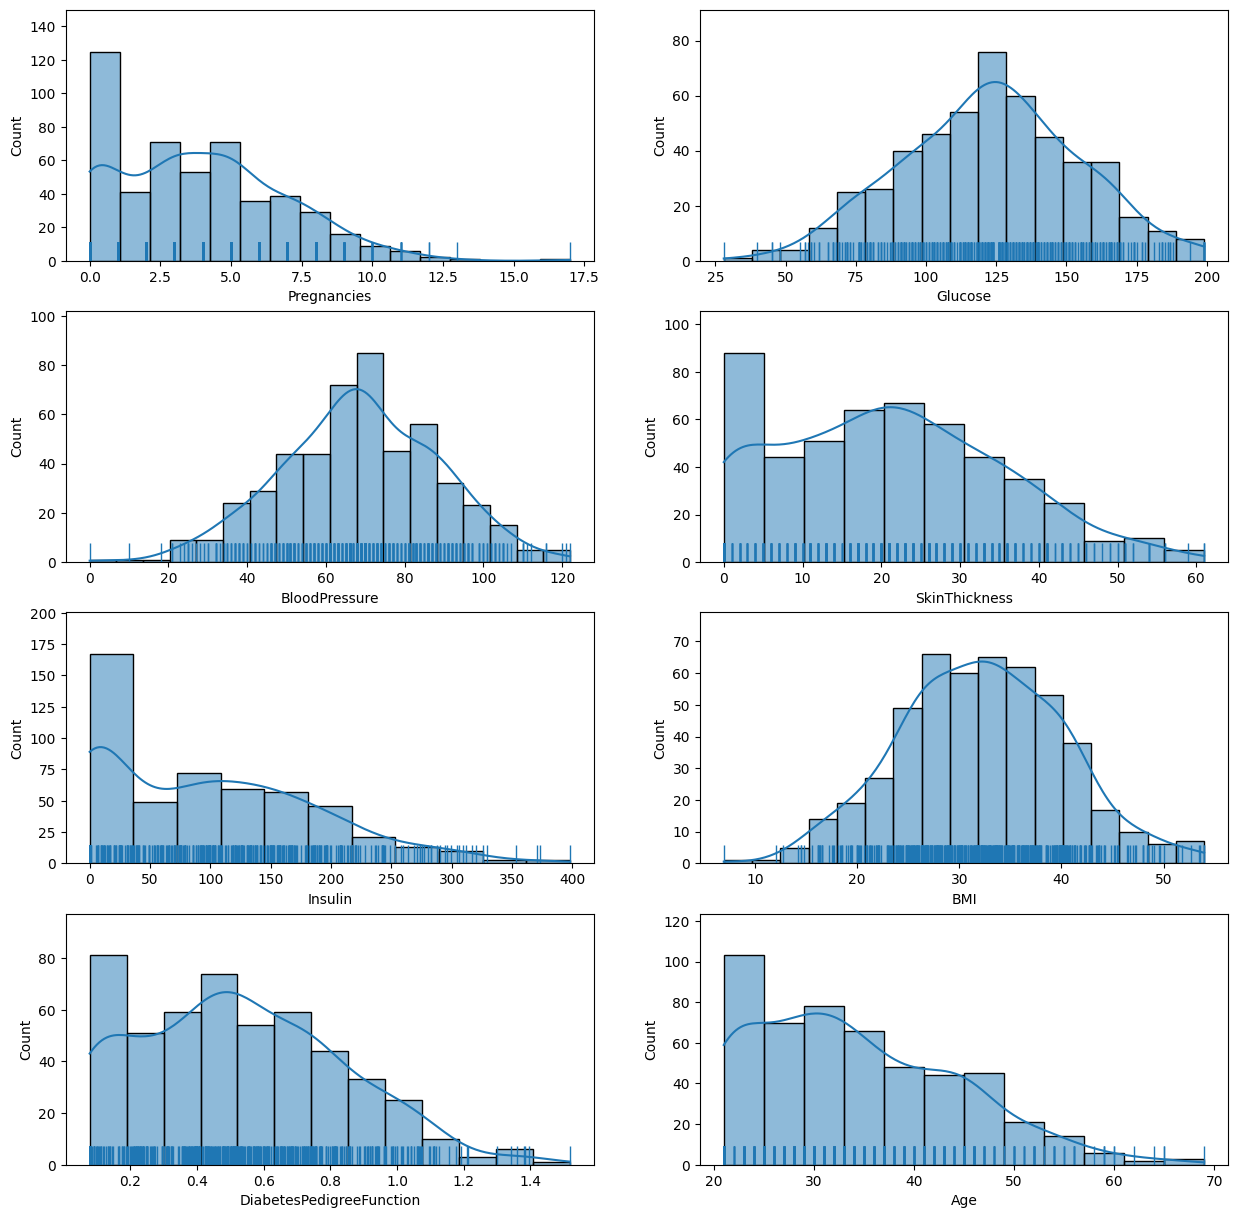

In [6]:
def draw_histplot(height = 0.075):
  # plotting the 8 input features together on the
  fig, axs = plt.subplots(4, 2, figsize=(15,15))
  # convert axes represented in 4x2 into 8x1 (2D array to 1D array)
  axs = axs.flatten()
  i = 0
  for col in dataset.columns[:8]:
    sns.histplot(dataset[col], ax = axs[i], kde = True)
    sns.rugplot(dataset[col], ax = axs[i], height=height)
    i+=1
  plt.show()

draw_histplot()

**Inference:** We see that the fields _Glucose, BloodPressure, SkinThickness, Insulin, BMI_ contain zeroes which is invalid; thus before proceding further we need to either drop the rows containing invalid values, or fill them with some other value.

Since there are large number of rows with 0 in fields _SkinThickness, Insulin_ and _BloodPressure_, instead of droppeing them, we will fill all of them with their respective means.

__Note__: It is possible for the fasting Insulin levels of a Type 1 diabetic person to fall to 0; since this is a rare circumstance, we will treat this value as incorrect.

## Filling Null Values

We fill in the missing values in the dataset with mean of the remaining data

In [7]:
# replacing 0s with NaN for easier calculations
# filling these NaN values with mean
for col in ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'):
  dataset[col].replace(0, np.NaN, inplace=True)
  mean = dataset[col].mean(skipna=True)
  dataset[col].fillna(value=mean, inplace=True)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,166,77.0,17.0,14.0,35.350722,0.659294,42,1
1,3,93,103.0,21.0,58.0,36.562365,0.078000,28,0
2,4,156,70.0,30.0,208.0,35.300467,0.477955,38,0
3,6,113,37.0,13.0,57.0,30.264344,0.814394,23,0
4,1,103,28.0,36.0,63.0,29.467469,0.321353,28,0
...,...,...,...,...,...,...,...,...,...
495,0,127,61.0,41.0,317.0,33.748725,0.616023,21,1
496,8,129,72.0,11.0,93.0,35.367609,0.741543,34,0
497,8,132,86.0,51.0,220.0,42.724582,0.101454,35,0
498,8,145,94.0,37.0,217.0,39.977729,0.840976,31,1


## Outlier Detection (Box Plots)

We check for outliers in the dataset using boxplots on each field

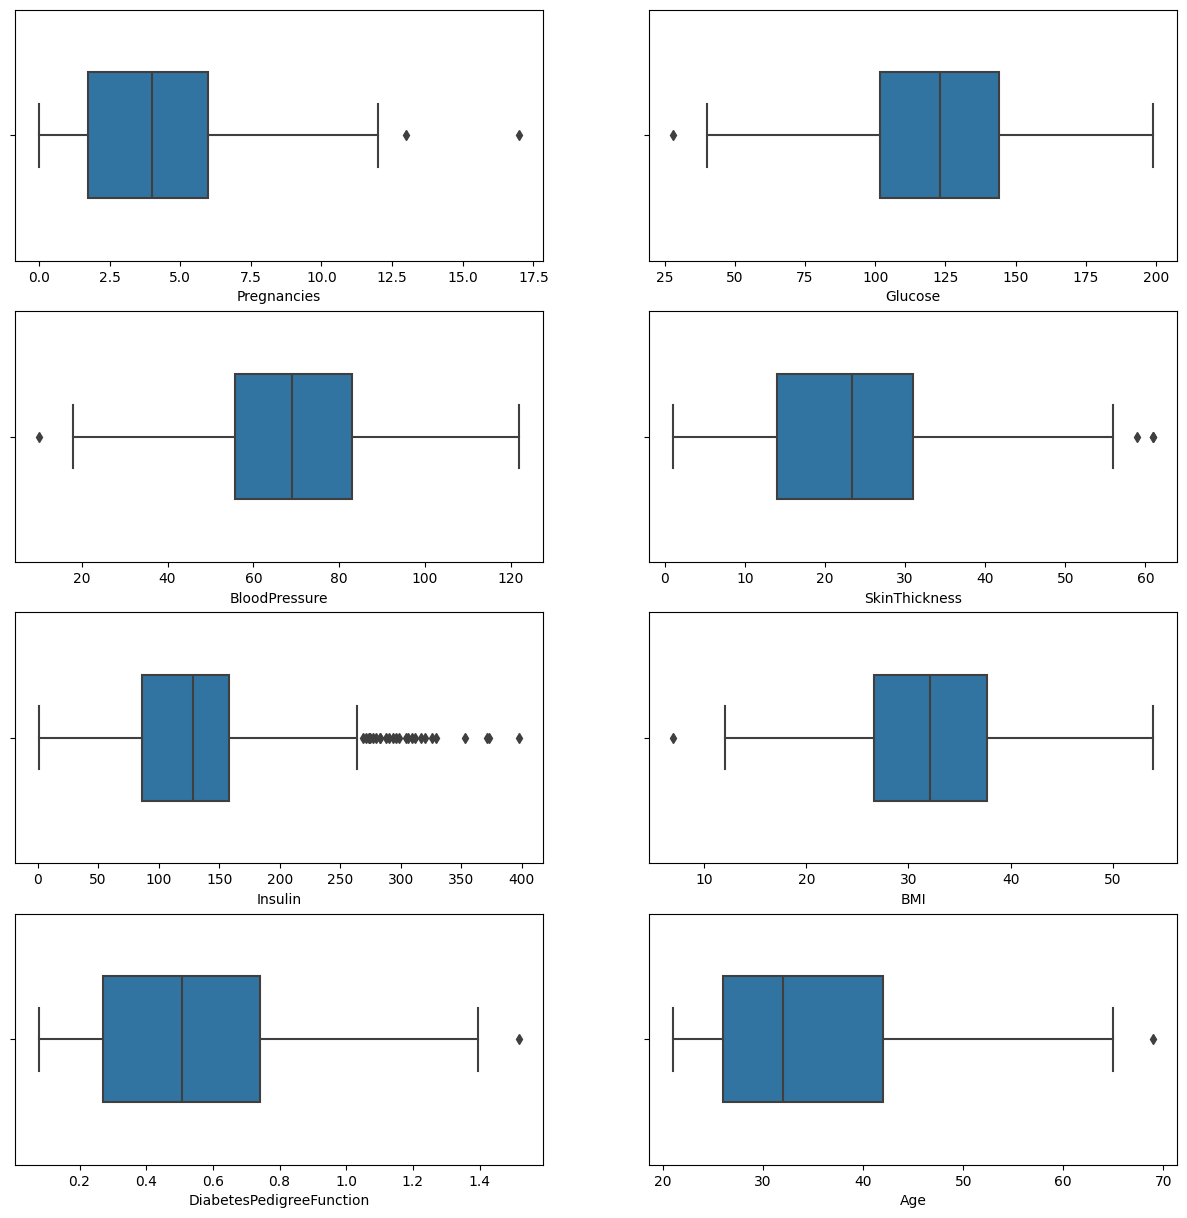

In [8]:
def draw_boxplot(width=0.5):
  # plotting the 8 input features together on the same figure
  fig, axs = plt.subplots(4, 2, figsize=(15,15))
  # convert axes represented in 4x2 into 8x1 (2D array to 1D array)
  axs = axs.flatten()
  i = 0
  for col in dataset.columns[:8]:
    sns.boxplot(x=dataset[col], ax=axs[i], width=width)
    i+=1
  plt.show()

draw_boxplot()

**Inference:** We see that there are few outlying points. Out of all these outliers, we remove the most extreme ones.


## Deleting outliers

We delete the extreme outlying points, identified by having z-score more than 3.2 (distance from mean more than 3 times the standard deviation).

In [9]:
for col in ('Insulin', 'BMI', 'BloodPressure', 'Pregnancies', 'Age'):
  mean = dataset[col].mean()
  std = dataset[col].std()
  upper_bound = mean + 3.2*std
  lower_bound = mean - 3.2*std
  dataset = dataset[(dataset[col] <= upper_bound) & (dataset[col] >= lower_bound)]

## Inter Feature Relations

We plot the correlation heatmap and pairplot to visualize the relation between the features.

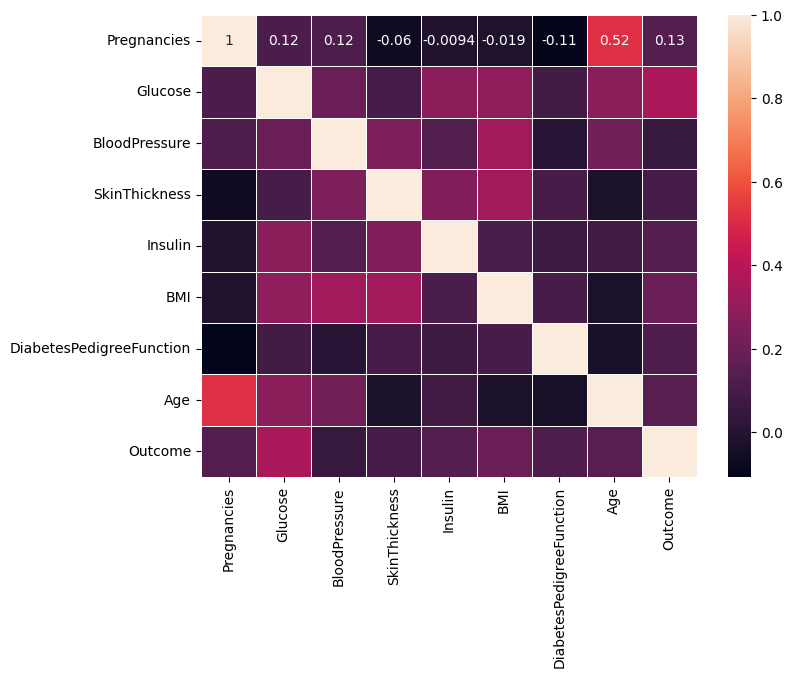

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dataset.corr(), linewidths=0.5, ax=ax, annot=True)
plt.show()

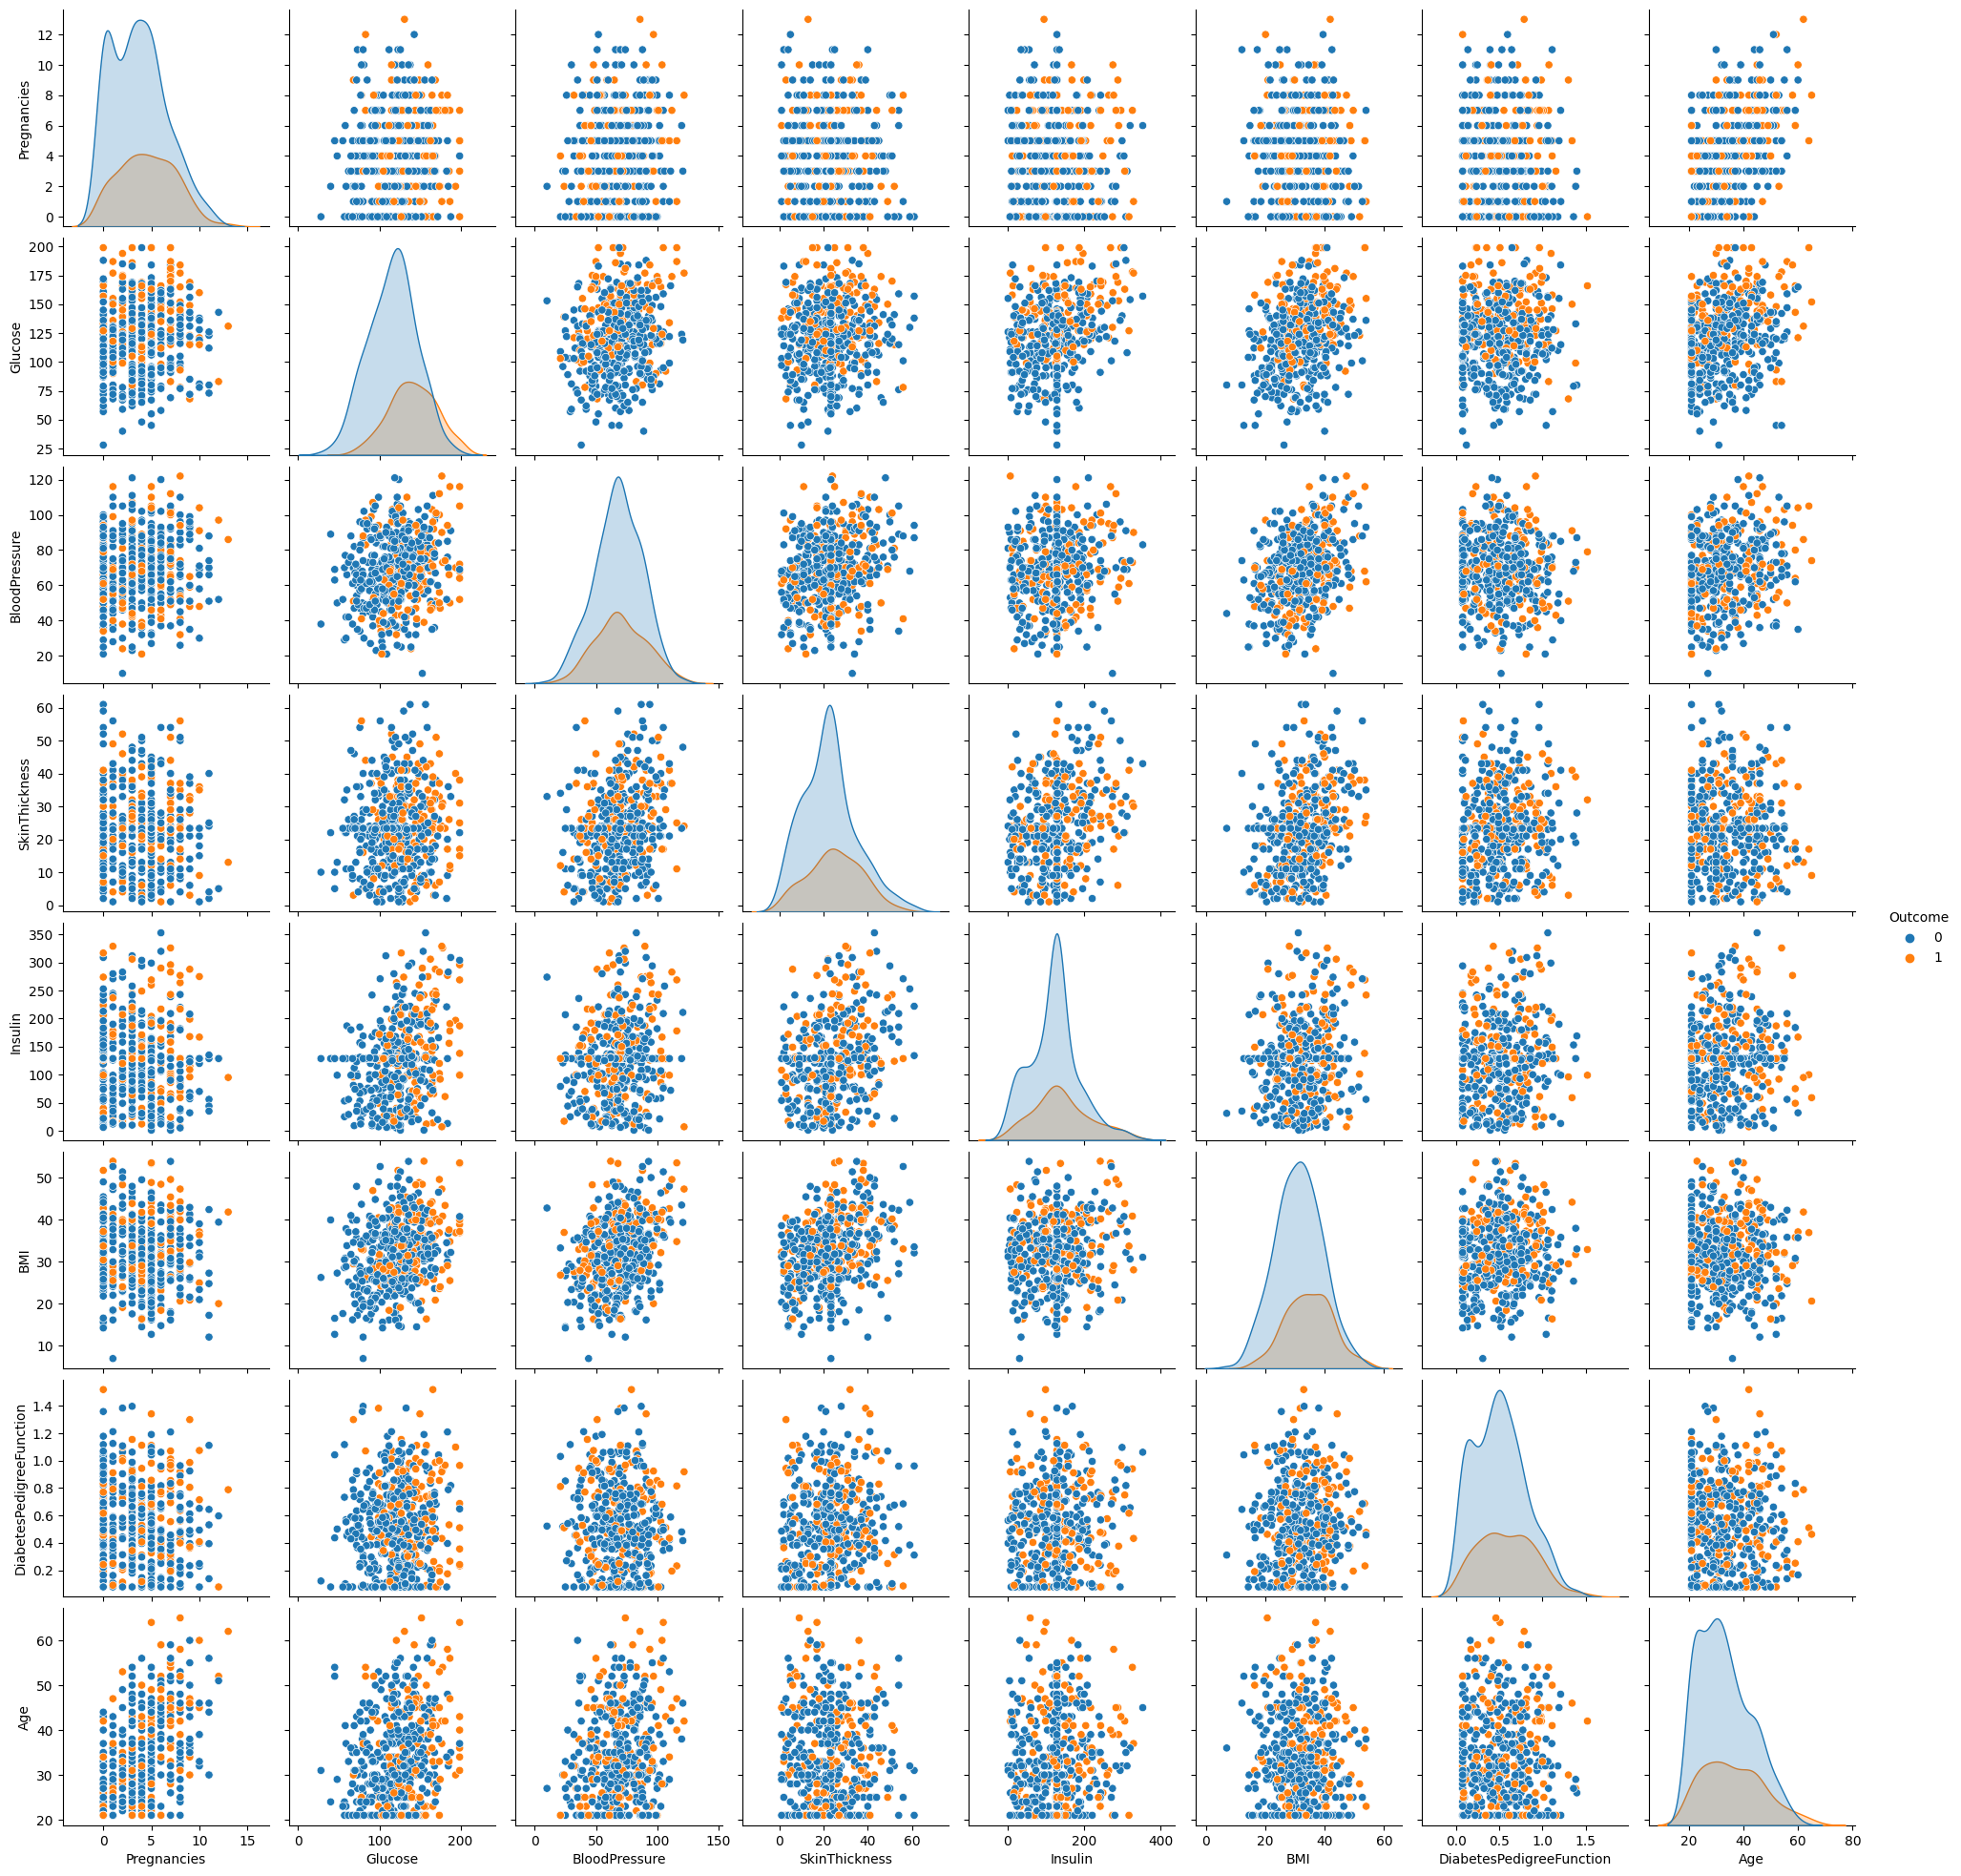

In [11]:
sns.pairplot(dataset, hue = 'Outcome')
plt.show()

**Inference:** From both the plots, we expect Pregnancies, Glucose and BMI to affect the outcome the most. We see some interdependence between Insulin and SkinThickness; and Age and Pregnancies.

## Saving Preprocessed Dataset

We save the preprocessed dataset into preprcessed.csv file. We also redraw all the graphs after preprocessing.

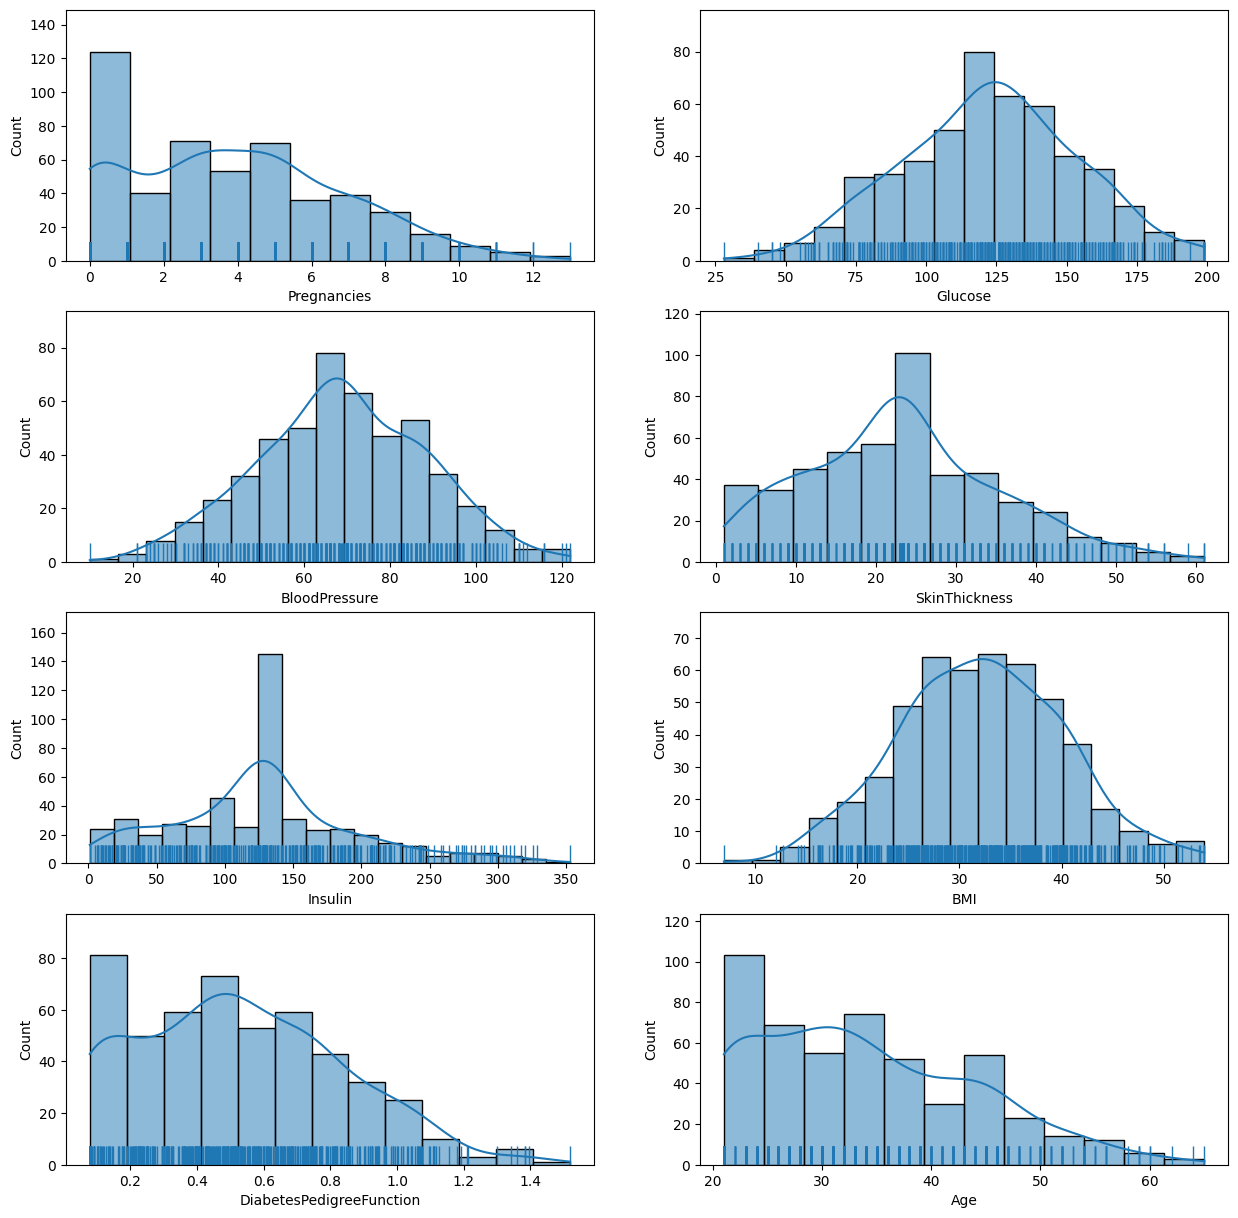

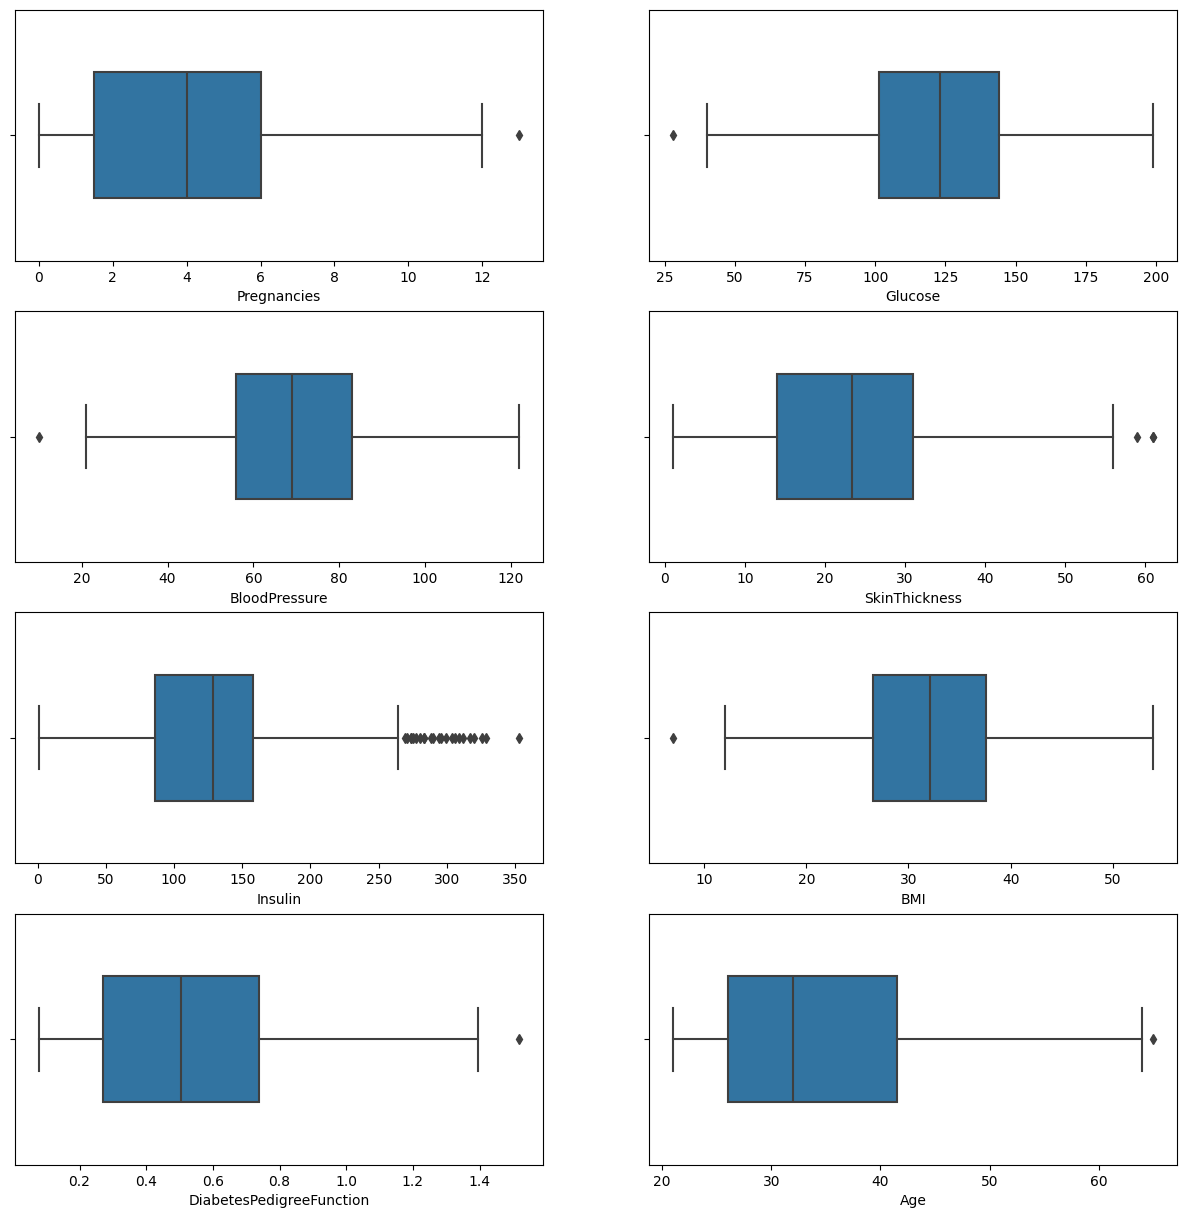

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               495 non-null    int64  
 1   Glucose                   495 non-null    int64  
 2   BloodPressure             495 non-null    float64
 3   SkinThickness             495 non-null    float64
 4   Insulin                   495 non-null    float64
 5   BMI                       495 non-null    float64
 6   DiabetesPedigreeFunction  495 non-null    float64
 7   Age                       495 non-null    int64  
 8   Outcome                   495 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 38.7 KB


In [12]:
dataset.to_csv("preprocessed.csv")
draw_histplot()
draw_boxplot()
dataset.info()

**Final Comments:** After Preprocessing we are left with 495 datapoints which do not contain any erroneous values. We can now apply Machine Learning Algorithms to the same.

## Test-Train Split

### Loading the preprocessed dataset
We load our preprocessed dataset, divide it into testing and training dataset

In [13]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('preprocessed.csv', index_col=0)

# random state provides reproducible results through seed
def test_train_split(dataset: pd.DataFrame, test_size = 0.25, random_state = 0):
  np.random.seed(random_state)
  # shuffle indices
  indices = np.random.permutation(len(dataset)).tolist()
  dataset_test_size = int(dataset.shape[0]*test_size)

  # separating test-train indices
  test_indices = indices[:dataset_test_size]
  train_indices = indices[dataset_test_size:]
  return (dataset.iloc[test_indices], dataset.iloc[train_indices])

test, train = test_train_split(dataset)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
368,0,95,93.0,32.0,175.0,36.724896,0.221120,21,0
400,6,115,89.0,54.0,158.0,29.563737,0.959591,50,0
242,1,144,65.0,41.0,245.0,42.652425,0.078000,39,0
60,0,123,88.0,38.0,101.0,51.773695,0.628757,28,1
495,0,127,61.0,41.0,317.0,33.748725,0.616023,21,1
...,...,...,...,...,...,...,...,...,...
328,5,137,62.0,34.0,137.0,34.039446,1.064737,33,0
195,7,165,103.0,37.0,142.0,32.167734,0.554430,55,1
120,0,127,84.0,34.0,185.0,42.738102,0.375634,32,1
47,0,116,53.0,19.0,167.0,39.907912,0.078000,33,0


### Feature Scaling (Standardization)

We Standardize the features for a more efficient model scaling. We pick up the mean and standard deviation from the training set, but apply it to the whole dataset.

In [14]:
def standardize(test: pd.DataFrame, train: pd.DataFrame):
  n = len(train.columns)
  for col in train.columns[:n-1]:
    mean = train[col].mean()
    std = train[col].std()
    train.loc[:,col] = (train[col]-mean)/std
    test.loc[:,col] = (test[col]-mean)/std
  # adding dummy 1s as the first column of the datasets (used in matrix operations)
  train_ex = np.concatenate((np.ones(shape = (train.shape[0], 1)), train), axis = 1)
  train_ex.astype(np.longdouble)
  test_ex = np.concatenate((np.ones(shape = (test.shape[0], 1)), test), axis = 1)
  test_ex.astype(np.longdouble)
  return (test_ex, train_ex)

test_ex, train_ex = standardize(test, train)
test_ex[0]

array([ 1.        , -1.01674231, -0.42921366, -0.27895551, -0.85508417,
       -0.70920686, -0.29013661,  0.02042093, -0.97528093,  0.        ])

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## Splitting Dataset into test and train set

In [15]:
import random
import pandas as pd
import numpy as np
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
random.seed(0)
test[0]

array([ 1.        , -1.01674231, -0.42921366, -0.27895551, -0.85508417,
       -0.70920686, -0.29013661,  0.02042093, -0.97528093,  0.        ])

## **_Stochastic Gradient Descent_**

In [16]:
# We will use w for the vector representing weights and b for the number representing bias
# we are not using tolerance to break out of loop in SGD, because few points may randomly be on our curve
# remember that the last column of train contains outcome
def sgd_regressor(train: np.ndarray, learning_rate = 0.4, max_iters = 100000, random_seed=0):
  np.random.seed(random_seed)
  # initializing w with random values
  W = np.random.randn(train.shape[1]-1)
  # run till max iterations
  for _ in range(max_iters):
    # select a random next row
    nextrow = train[random.randint(0, len(train)-1)]
    # extract features and target
    x_i = nextrow[:len(nextrow)-1]
    y_i = nextrow[len(nextrow)-1]
    
    # Apply SGD update rule
    y_pred = np.dot(x_i, W.T)
    error = y_pred-y_i
    W -= learning_rate*x_i*error

    # Decrease learning rate for next iteration
    learning_rate /= 1.0005
  return W

W = sgd_regressor(train)
print("Weights:", list(W))

Weights: [4.173383670421268, -74.50009162373433, -89.15146765380621, -64.9614653521154, -38.099972350728464, 44.46818288616215, 104.0663009308259, -7.369114345216334, 128.88720922941397]


## **_Batch Gradient Descent_**

In [17]:
def bgd_regressor(train: np.ndarray, learning_rate = 0.4, max_iters = 10, tolerance = 1e-7, random_seed=0):
  np.random.seed(random_seed)
  X = np.array(train[:, :-1])
  Y = np.array(train[:, -1])
  W = np.random.randn(X.shape[1])
  n = len(train)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = np.dot(X.T, Y_pred-Y)
    change = (learning_rate/n)*gradient
    W -= change
    if np.linalg.norm(change) < tolerance: break
    learning_rate /= 1.02
  return W

W = bgd_regressor(train)

## **_Insights drawn (plots, markdown explanations)_**

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
W_stoic = sgd_regressor(train)
W_batch = bgd_regressor(train)

X_test = np.array(test[:, :-1])
Y_test = np.array(test[:, -1])
print("SGD R2_Score: ", r2_score(Y_test, np.dot(X_test, W_stoic)))
print("BGD R2_Score: ", r2_score(Y_test, np.dot(X_test, W_batch)))
print("SGD MSE: ", mean_squared_error(Y_test, np.dot(X_test, W_stoic)))
print("BGD MSE: ", mean_squared_error(Y_test, np.dot(X_test, W_batch)))

SGD R2_Score:  0.08116520473257571
BGD R2_Score:  -0.10772337434014134
SGD MSE:  0.18377910572273293
BGD MSE:  0.22155931857712133


# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## Splitting Dataset into test and train set

In [19]:
import numpy as np
import pandas as pd
import random
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
random.seed(0)
test[0]

array([ 1.        , -1.01674231, -0.42921366, -0.27895551, -0.85508417,
       -0.70920686, -0.29013661,  0.02042093, -0.97528093,  0.        ])

## Transforming linear data into polynomial

In [20]:
# Assume that the first column is dummy ones and the last column is outcome
# degrees is the list of powers to consider
def poly_transform(data: np.ndarray, degrees = [1, 2, 3, 4]):
  data2 = np.ones((data.shape[0], 1))
  for i in degrees:
    for col in range(1, len(data[0])-1):
      data2 = np.concatenate((data2, data[:, [col,]]**i), axis=1)

  return np.concatenate((data2, data[:, [-1,]]), axis=1)

train = poly_transform(train)
test = poly_transform(test)
test[0]

array([ 1.00000000e+00, -1.01674231e+00, -4.29213661e-01, -2.78955509e-01,
       -8.55084173e-01, -7.09206857e-01, -2.90136607e-01,  2.04209305e-02,
       -9.75280934e-01,  1.03376492e+00,  1.84224367e-01,  7.78161762e-02,
        7.31168942e-01,  5.02974367e-01,  8.41792510e-02,  4.17014403e-04,
        9.51172901e-01, -1.05107253e+00, -7.90716151e-02, -2.17072511e-02,
       -6.25210990e-01, -3.56712870e-01, -2.44234823e-02,  8.51582214e-06,
       -9.27660795e-01,  1.06866991e+00,  3.39386174e-02,  6.05535727e-03,
        5.34608022e-01,  2.52983214e-01,  7.08614630e-03,  1.73901012e-07,
        9.04729887e-01,  0.00000000e+00])

## **_Lasso Regression_**

In [21]:
def lasso_regressor(train: np.ndarray, learning_rate = 1e-20, l1_penalty = 1e10, max_iters = 10000, random_seed=0):
  np.random.seed(random_seed)
  X = np.array(train[:, :-1])
  Y = np.array(train[:, -1])
  W = np.random.randn(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W
  
W = lasso_regressor(train)
W

array([ 1.76405135,  0.40015621,  0.97873698,  2.2408922 ,  1.86755699,
       -0.97727688,  0.95008742, -0.15135621, -0.10321785,  0.4105975 ,
        0.14404257,  1.45427251,  0.76103673,  0.12167402,  0.44386223,
        0.33367333,  1.49407807, -0.20515726,  0.3130667 , -0.85409474,
       -2.55298882,  0.6536176 ,  0.8644352 , -0.74216402,  2.26975362,
       -1.45436467,  0.04575752, -0.18718285,  1.53277821,  1.46935777,
        0.15494643,  0.37816152, -0.88778475])

## **_Ridge Regression_**

In [22]:
def ridge_regressor(train: np.ndarray, learning_rate = 1e-10, l2_penalty = 1e-11, max_iters = 10000, random_seed=0):
  np.random.seed(random_seed)
  X = np.array(train[:, :-1])
  Y = np.array(train[:, -1])
  W = np.random.randn(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l2_penalty*2*W
    change = learning_rate*gradient
    W -= change
    learning_rate /= 1.002
  return W
  
W = ridge_regressor(train)
W

array([ 1.76405176,  0.40015731,  0.97873761,  2.24089307,  1.86755777,
       -0.97727839,  0.95008826, -0.15135725, -0.10321897,  0.41059835,
        0.14404279,  1.45427283,  0.76103661,  0.12167314,  0.44386262,
        0.33367366,  1.49407864, -0.20515728,  0.31306662, -0.85409585,
       -2.552991  ,  0.65361477,  0.86443542, -0.74216542,  2.2697544 ,
       -1.45436357,  0.04575595, -0.1871861 ,  1.53277443,  1.46934684,
        0.15494533,  0.3781607 , -0.88778618])

## **_Insights drawn (plots, markdown explanations)_**

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
test, train = poly_transform(test, degrees = [1, 2, 3, 4]), poly_transform(train, degrees = [1, 2, 3, 4])
W_lasso = lasso_regressor(train)
W_ridge = ridge_regressor(train)

X_test = np.array(test[:, :-1])
Y_test = np.array(test[:, -1])
Y_pred_lasso = np.dot(X_test, W_lasso)
Y_pred_ridge = np.dot(X_test, W_ridge)
print("Lasso R2_Score: ", r2_score(Y_test, Y_pred_lasso))
print("Ridge R2_Score: ", r2_score(Y_test, Y_pred_ridge))
print("Lasso MSE: ", mean_squared_error(Y_test, Y_pred_lasso))
print("Ridge MSE: ", mean_squared_error(Y_test, Y_pred_ridge))
Y_pred_ridge

Lasso R2_Score:  -3169.4399092002077
Ridge R2_Score:  -3169.412310009312
Lasso MSE:  634.1298939282062
Ridge MSE:  634.1243737251756


array([  0.15150652,   3.59286013,   4.90246463,   8.75181629,
        12.59428183,  26.26777624,   3.78774303,   9.53622044,
         5.54424474,  -0.52825809,  -6.29268667,   4.64979365,
         1.71138683,  13.27125527,  13.00869499,  14.61535619,
        10.96354642,  12.16579049,  11.14634926,   9.17487305,
        -3.9641581 ,  12.89923669,   7.8210937 ,   9.52389472,
        -3.34447432,   6.95880881,   1.06390586,  17.37154263,
        10.25548625,  -0.6477777 ,  70.24843339,   3.88027404,
        -2.3664575 ,  -1.16232214,   8.26232252,   9.61311906,
        86.43931167,  -0.46604854,  21.64834995,   5.32366417,
        14.25157771,  -6.5022115 ,   5.09365007,   1.24831237,
       -65.09979797,   9.76456317,   3.79256635,   6.4977044 ,
        13.81338218,   2.76172616,  10.33482286,   3.43288456,
        16.76302141,   1.48188719,  15.95653017,   6.49295937,
        28.24897178, -55.68028401,   3.82626573,  21.34660499,
        35.59842767,   8.93155712,   3.43735035,   5.35

# **_5. Comparison of Logistic Regression and Least Squares Classification_**



# Splitting dataset into test and training

In [24]:
import numpy as np
import pandas as pd
import random
dataset = pd.read_csv('preprocessed.csv', index_col = 0)
test, train = test_train_split(dataset)
test, train = standardize(test, train)
random.seed(0)
test[0]

array([ 1.        , -1.01674231, -0.42921366, -0.27895551, -0.85508417,
       -0.70920686, -0.29013661,  0.02042093, -0.97528093,  0.        ])

## **_Logistic Regression_**

In [54]:
# Below is the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression
def logistic_regression(train: np.ndarray,learning_rate=1e-3,max_iteration=10000,tolerance=1e-3):
    m , n = train.shape
    X = train[:,:-1]
    Y = train[:,-1]
    W = np.random.randn(n-1)
    for _ in range(max_iteration):
        z = np.dot(X, W)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (Y - predictions))
        W += learning_rate * gradient  
        learning_rate/=1.0005
        if np.linalg.norm(learning_rate * gradient) < tolerance:
            break
    return W

W = logistic_regression(train)
print("Weights:", list(W))

def logistic_predict(X,W):
    r = np.dot(X.T, W)
    predictions = sigmoid(r)
    return np.round(predictions)

m , n = test.shape
X_test = test[:,:-1]
Y_test = test[:,-1]
y_pred = logistic_predict(X_test.T, W)
accuracy = np.mean(y_pred == Y_test)
print("Accuracy:", accuracy)

Weights: [-1.2335803177971405, 0.3104485486009407, 0.9092726187571692, -0.3074992107688036, 0.21025296336389288, 0.027620485082889452, 0.3462289458225074, 0.1672584780222939, 0.101225009681381]
Accuracy: 0.7560975609756098


## **_Least Squares Classification_**

In [52]:
def least_square(train: np.ndarray):
    X = train[:,:-1]
    Y = train[:,-1]
    W = np.linalg.pinv(X) @ Y
    return W

W = least_square(train)
print("Weights:", list(W))

def least_square_predict(X,W):
    np.random.seed(2)
    predictions = np.dot(X.T, W)
    return np.round(predictions)

m , n = test.shape
X_test = test[:,:-1]
Y_test = test[:,-1]
y_pred = least_square_predict(X_test.T, W)
accuracy = np.mean(y_pred == Y_test)
print("Accuracy:", accuracy)

Weights: [0.27688172043010745, 0.04878064263952961, 0.13804963680196486, -0.04768870910169816, 0.02978367437012793, 0.010368059543649378, 0.058261903791782255, 0.030840730848244645, 0.025543326743173046]
Accuracy: 0.7560975609756098


## **_Insights drawn (plots, markdown explanations)_**

# **_5. References_**

1.   List item
2.   List item

